In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2
from residual import ResidualComp

In [3]:
dic = {'LCDM':{'params':['H0','Omega_m'],'datafile':'Chains/Pantheon_LCDM.h5'},
      'wCDM':{'params':['H0','Omega_m','w0'],'datafile':'Chains/Pantheon_wCDM.h5'},
      'CPL':{'params':['H0','Omega_m','w0','wa'],'datafile':'Chains/Pantheon_CPL.h5'},
      'kLCDM':{'params':['H0','Omega_m','Omega_k'],'datafile':'Chains/Pantheon_kLCDM.h5'}}

In [4]:
resPos = ResidualComp(dic,'position',1000,1)
#resPix = ResidualComp(dic,'pixel',1000,1)

In [9]:
import numpy as np

In [26]:
from tqdm import tqdm

In [28]:
cls = []
cls_mc = []
for i in tqdm(range(100)):
    sss = resPos.residuals['LCDM'].samples[np.random.randint(0,1000,1)][0]
    cls_mc.append(resPos.residuals['LCDM'].get_residual_cls(param=sss))
    cls_b = []
    for j in range(100):
        cls_b.append(resPos.residuals['LCDM'].get_residual_cls(param=sss, bootstrap=True))
    cls_b = np.array(cls_b)
    cls.append(cls_b)
cls = np.vstack(cls)



  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [01:44<00:00,  1.05s/it]


In [30]:
cls_mc = np.array(cls_mc)

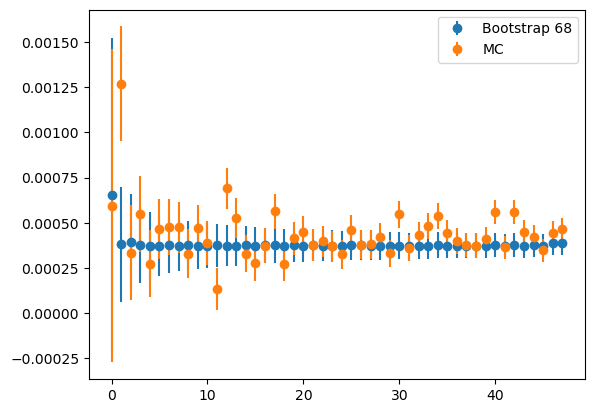

In [34]:
plt.errorbar(np.arange(48),cls.mean(axis=0),yerr=cls.std(axis=0),fmt='o', label='Bootstrap 68')
plt.errorbar(np.arange(48),cls_mc.mean(axis=0),yerr=cls.std(axis=0),fmt='o', label='MC')
plt.legend()

In [15]:
resPos.results

{'LCDM': array([[8.90605393e-04, 5.73661107e-05, 1.53965104e-04, ...,
         4.17459626e-04, 4.67747123e-04, 3.73266273e-04],
        [6.31289397e-04, 1.57693517e-04, 3.19426898e-04, ...,
         4.03231541e-04, 4.71719798e-04, 5.33059869e-04],
        [1.01584155e-03, 5.59674059e-04, 3.02422481e-04, ...,
         5.01582989e-04, 4.34919636e-04, 4.19425092e-04],
        ...,
        [1.52060189e-06, 3.82538423e-04, 3.19801007e-04, ...,
         3.15817996e-04, 4.19888208e-04, 2.99416532e-04],
        [4.62165621e-04, 7.81296953e-05, 5.76091912e-04, ...,
         3.81857581e-04, 3.93915534e-04, 5.36701694e-04],
        [1.47742232e-03, 2.45153438e-04, 1.67052118e-04, ...,
         4.11814939e-04, 3.85995528e-04, 3.97289200e-04]]),
 'wCDM': array([[4.31848003e-05, 6.96408703e-05, 3.39152963e-04, ...,
         4.09700055e-04, 3.14259509e-04, 3.74912191e-04],
        [1.19719898e-03, 8.57283095e-04, 1.21785670e-04, ...,
         4.26578117e-04, 3.88510180e-04, 3.10646395e-04],
        [

In [12]:
resPos.run_bootstraping()

Running bootstraping on position for model: LCDM


Monte Carlo Samples: 100%|██████████| 1000/1000 [00:15<00:00, 63.61samples/s]


Running bootstraping on position for model: wCDM


Monte Carlo Samples: 100%|██████████| 1000/1000 [00:10<00:00, 92.06samples/s]


Running bootstraping on position for model: CPL


Monte Carlo Samples: 1005samples [00:10, 98.02samples/s]                     


Running bootstraping on position for model: kLCDM


Monte Carlo Samples: 1002samples [00:10, 95.88samples/s]                     


In [ ]:
resPix.run_bootstraping()

Running bootstraping on pixel for model: LCDM


Monte Carlo Samples: 100%|██████████| 100/100 [00:17<00:00,  5.80samples/s]


Running bootstraping on pixel for model: wCDM


Monte Carlo Samples: 100%|██████████| 100/100 [00:17<00:00,  5.79samples/s]


Running bootstraping on pixel for model: CPL


Monte Carlo Samples: 100%|██████████| 100/100 [00:16<00:00,  6.13samples/s]


Running bootstraping on pixel for model: kLCDM


Monte Carlo Samples: 100%|██████████| 100/100 [00:15<00:00,  6.29samples/s]


In [14]:
resPix.plot()

KeyError: 'LCDM'

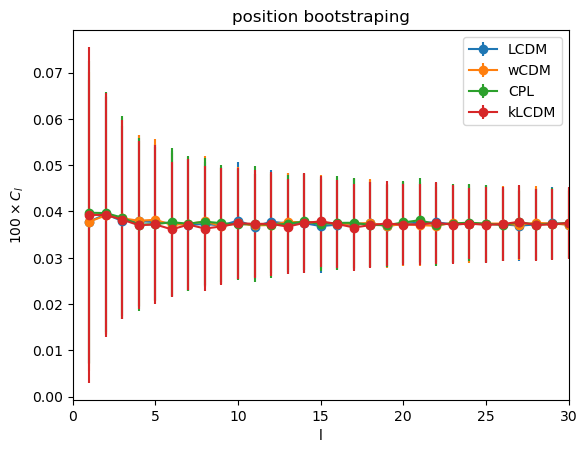

In [18]:
resPos.plot()

In [58]:
import healpy as hp

In [11]:
bl = hp.pixwin(2048)

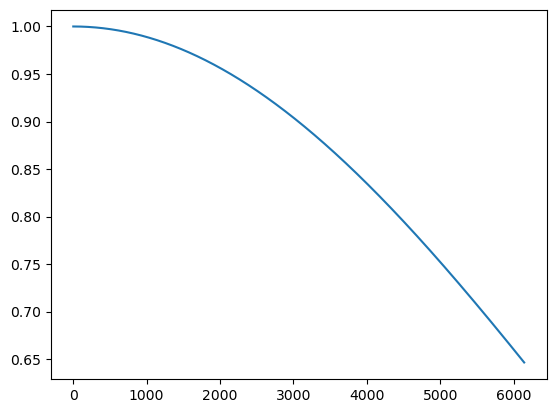

In [12]:
plt.plot(bl)